# Chapter 4: Clustering 

## 4.2 Clustering Objective 

In [5]:
using LinearAlgebra
using VMLS

Jclust(x, centroids, assignment) = avg([norm(x[i] - centroids[assignment[i]])^2 for i=1:length(x)])
x = [ [0,1], [1,0], [-1,1] ]
centroids = [ [1,1], [0,0] ]
assignment1 = [1,2,1]
assignment2 = [1,1,2]
Jclust(x,centroids,assignment1), Jclust(x,centroids,assignment2)

(2.0, 1.3333333333333333)

## 4.3 k-means algorithm

In [22]:
using Printf

function kmeans(x, k, maxiters = 100, epsilon=1e-5)
    N = length(x)
    n = length(x[1])
    #distances = zeros(N) # stores distance b/w each point and nearest centroid

    centroids = [zeros(n) for j=1:k]

    # initial random assignment of clusters 
    assignments = [rand(1:k) for i=1:N]

    Jprev = Inf
    for iter = 1:maxiters

        # update centroids 
        for j=1:k
            group = [i for i=1:N if assignments[i] == j]
            centroids[j] = sum(x[group]) / length(group)
        end;

        # find nearest centroid and update group assignment 
        for i=1:N
            xi = x[i]
            # distances[i], assignments[i] = findmin([norm(xi - centroids[j]) for j = 1:k])
            assignments[i] = argmin([norm(xi - centroids[j]) for j = 1:k])
        end;

        #J = norm(distances)^2 / N
        J = Jclust(x, centroids, assignments)

        @printf("Iteration %d: Jclust = %f.\n", iter, J)
        if(iter > 1 && abs(J-Jprev) < epsilon * J)
            return assignments, centroids
        end

        Jprev = J
    end
end
        

kmeans (generic function with 3 methods)

In [32]:
X = vcat([.3*randn(2) for i=1:100], [[1,1] + .3*randn(2) for i=1:100], [[1,-1] + .3*randn(2) for i=1:100])
assignment = [rand(1:k) for i=1:N]
j = 1
group = [X[i] for i=1:N if assignment[i] == j]
group
avg(group)

2-element Vector{Float64}:
  0.6691447714619948
 -0.07119010430448296

In [41]:
function kmeans2(X, k; maxiters=100, episilon=1e-5)
    N = length(X); n = length(X[1]);
    # centroid assignment 
    centroids = [zeros(n) for j=1:k]
    # random assignment
    assignment = [rand(1:k) for i=1:N]
    Jprev = Inf
    for iter=1:maxiters
        # update centroids 
        for j=1:k
            group = [X[i] for i=1:N if assignment[i] == j]
            centroids[j] = avg(group)
        end 

        # update assignment
        for i=1:N
            xi = X[i]
            assignment[i] = argmin([norm(xi - centroids[j])^2 for j=1:k])
        end

        J = Jclust(X, centroids, assignment)
        @printf("Iteration %d: Jclust = %f\n", iter, J)

        if iter > 1 && abs(J-Jprev) < episilon*J
            return assignment, centroids
        end
        Jprev = J
    end
end



kmeans2 (generic function with 1 method)

In [54]:
a = [[.3*randn(2) for i=1:100]; [[1,1] + .3*randn(2) for i=1:100]; [[1,-1] + .3*randn(2) for i=1:100]]

300-element Vector{Vector{Float64}}:
 [0.49203622427130644, 0.266918614228344]
 [0.041713702283868864, -0.3181998232002254]
 [0.414130401260524, -0.19098400271561058]
 [0.15659686160296232, -0.4812540933653698]
 [-0.09388159642436127, -0.1729320814439832]
 [0.30702916399315555, -0.12948188106010786]
 [-0.28612081396996175, 0.187628125891872]
 [-0.11476844487537627, -0.1291372629073042]
 [-0.28634082124136306, 0.1650158401203725]
 [-0.03799207480255277, -0.07727020891711973]
 ⋮
 [1.446635274502371, -0.8997797297963169]
 [0.9763690505494663, -1.1378168650622265]
 [1.0874596398988166, -0.5687195093982227]
 [1.157358434368043, -0.862038076314452]
 [1.3450770919631545, -0.9889804545155237]
 [0.8744005907110938, -1.2431663259731476]
 [1.1951944164442556, -1.021957300418427]
 [1.2529583068587593, -1.111207303780355]
 [0.21314245903624274, -1.2407149128598534]

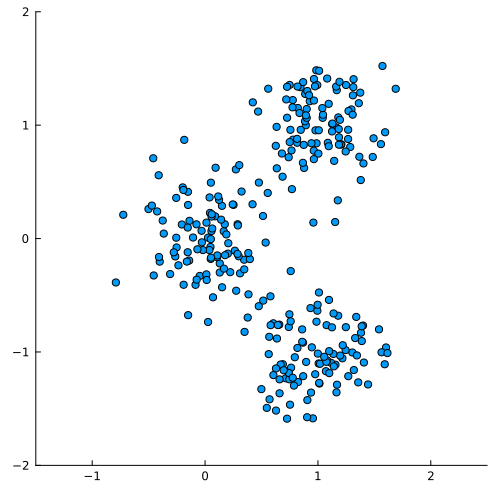

In [47]:
using Plots
X = vcat([.3*randn(2) for i=1:100], [[1,1] + .3*randn(2) for i=1:100], [[1,-1] + .3*randn(2) for i=1:100])
xs = [x[1] for x in X]
ys = [x[2] for x in X]
scatter(xs, ys)
plot!(legend=false, grid=false, size=(500,500),xlims=(-1.5,2.5),ylims=(-2,2))

Iteration 1: Jclust = 0.868240
Iteration 2: Jclust = 0.233571
Iteration 3: Jclust = 0.163392
Iteration 4: Jclust = 0.160509
Iteration 5: Jclust = 0.160509


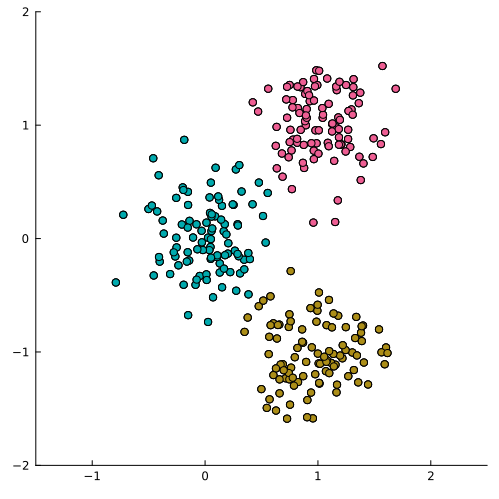

In [49]:
k = 3
N = length(X)
assignment, centroids = kmeans2(X, k)
groups = [[X[i] for i=1:N if assignment[i] == j] for j=1:k]

for grp in groups
    xs = [x[1] for x in grp]
    ys = [x[2] for x in grp]
    scatter!(xs, ys)
end
plot!(legend=false, grid=false, size=(500,500),xlims=(-1.5,2.5),ylims=(-2,2))